<a href="https://colab.research.google.com/github/sautrikc/Bank-Campaign/blob/main/Bank_Campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of the success of a bank marketing campaign

This notebook predicts the success of a bank marketing campaign. The data has been obtained from https://www.kaggle.com/yufengsui/portuguese-bank-marketing-data-set . The program has been divided into two sections : EDA and the ML algorithm.

## Preprocessing and EDA

### 1. Importing important libraries

In [1]:
import numpy as np                           #For calculations
import matplotlib.pyplot as plt              #For making graphs
import pandas as pd                          #For operations on dataframes                    
import seaborn as sns                        #For making graphs with better visualizations                

### 2. Reading the data

In [2]:
df=pd.read_csv('bank-full.csv',sep=';')
df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
10204,41,management,married,tertiary,no,6204,no,yes,unknown,11,jun,148,2,-1,0,unknown,no
42062,61,management,married,tertiary,no,477,yes,no,cellular,29,oct,377,1,520,1,other,yes
34851,44,blue-collar,married,primary,no,513,yes,no,cellular,6,may,338,4,-1,0,unknown,no
44097,47,management,single,tertiary,no,6651,no,no,cellular,8,jul,229,1,412,2,failure,yes
32500,48,management,single,tertiary,no,191,yes,no,cellular,17,apr,222,1,326,1,failure,no
23982,33,technician,married,secondary,no,74,no,no,cellular,29,aug,94,2,-1,0,unknown,no
43621,34,self-employed,married,tertiary,no,263,no,no,cellular,4,may,203,1,78,8,other,no
38721,33,blue-collar,married,secondary,no,-63,yes,no,cellular,15,may,126,2,350,1,failure,no
39683,24,blue-collar,single,secondary,no,383,no,no,cellular,27,may,101,1,-1,0,unknown,no
29510,32,management,single,tertiary,no,2360,no,no,cellular,3,feb,152,2,160,5,other,yes


The **feature** variables in the dataset include:

1.   age (Age): Indicates th age of the person
2.   job (Job): Indicates the profession of the person
3. marital (Marital Status): Indicates if the person is married.
4. education (Educational Level): Indicates the educational qualification of the person
5. default (Default status): Indicates if the person has credit in default.
6.  balance (Balance): Indicates the bank balance
7.  housing (Housing Loan Status): Indicates if the person has a housing loan
8. loan (Personal Loan Status): Indicates if the person has a personal loan
9. contact (Mode of contact): Indicates the mode of contact
9. day (Last contact day): Indicates the last contact day of the week
10. month (Last contact month): Indicates the last contact month of the year
11. duration (Last contact duration): Indicates the duration of the last contact in seconds
12. campaign (Number of contacts): Indicates the number of contacts performed during this campaign and for this client 
13. pdays (Number of days that passed by after the client was last contacted from a previous campaign)
14. previous (Number of contacts performed before this campaign and for this client)
15. poutcome (Outcome of the previous marketing campaign)

The **target** variable is y.



### 3. Preprocessing the data

In [3]:
df.shape

(45211, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


There are no missing values in the data. However, there are quite a few 'unknown'. We remove the rows that contain such values.

#### 3.a. Removing missing ('unknown/other') values

In [5]:
# Deleting the rows in which column 'poutcome' contains 'other'
condition = df.poutcome == 'other'
df2 = df.drop(df[condition].index, axis = 0, inplace = False)

In [6]:
# Deleting rows in which column 'education' and 'job' contains 'unknown'
col = ['education','job']
for column in col:
  condition = df2[column] == 'unknown'
  df2 = df2.drop(df2[condition].index, axis = 0)

#### 3.b Removing outliers in continous data

In [7]:
# Removing outliers based on zscore > 3 or zscore < -3
from scipy.stats import zscore

df2['balance_outliers'] = df2['balance']
df2['balance_outliers']= zscore(df2['balance_outliers']) #Creating an extra column with z scores and eliminating rows based on that

condition = (df2['balance_outliers']>3) | (df2['balance_outliers']<-3 )
df2 = df2.drop(df2[condition].index, axis = 0)

In [8]:
df3=df2.drop('balance_outliers',axis=1)

#### 3.d. Other transformations

In [9]:
# Changing the y column to binary

df4=pd.get_dummies(df3,columns=['y'])  #Performing one hot encoding and removing one y_no column
df4.drop('y_no',axis=1,inplace=True)
df4=df4.rename(columns={'y_yes':'response'})
df4.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,0
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,0


In [10]:
# Dropping column 'contact' which is not useful
df4.drop('contact',axis=1,inplace=True)

In [11]:
#Converting 'duration' to minutes
df4['duration'] = df4['duration'].apply(lambda n:n/60).round(2)
df4.head(5)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,0
5,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,0
6,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,0


In [12]:
#Encoding months to integers
df4['month'] = df4['month'].replace(to_replace=['jan','feb','mar','apr','may',
                                              'jun','jul','aug','sep','oct','nov','dec']
                                  , value=['1', '2','3','4','5','6','7','8','9',
                                           '10','11','12'])
df4.head(5)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,married,tertiary,no,2143,yes,no,5,5,4.35,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,5,5,2.52,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,5,1.27,1,-1,0,unknown,0
5,35,management,married,tertiary,no,231,yes,no,5,5,2.32,1,-1,0,unknown,0
6,28,management,single,tertiary,no,447,yes,yes,5,5,3.62,1,-1,0,unknown,0


In [14]:
# Dropping rows with duration <5s
condition = (df4['duration']<5/60)
df5 = df4.drop(df4[condition].index, axis = 0)


### 4. Exploratory Data Analysis

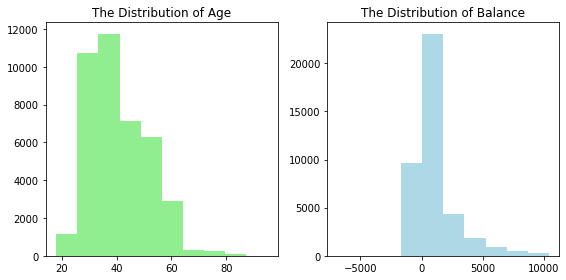

In [15]:
# Visualizing distribution of 'age' and 'balance'
age_balance_dist = plt.figure(figsize = (8,4))

ax1 = age_balance_dist.add_subplot(1,2,1) 
ax2 = age_balance_dist.add_subplot(1,2,2)

ax1.hist(df5['age'], color = 'lightgreen')
ax1.set_title('The Distribution of Age')

ax2.hist(df5['balance'], color = 'lightblue')
ax2.set_title('The Distribution of Balance')

plt.tight_layout()
plt.show() 

The **distribution of age** shows that the majority of the customers lie in the range of 30-50 years. The standard deviation of the dataset is fairly small and the data is almost normally distributed.

The **distribution of balance** shows the varibality of the data as it ranges from -6847 to 10399, after we have removed the outliers. The standard deviation for the data is also quite high at 1708.

In [16]:
df5.describe()

,age,balance,day,duration,campaign,pdays,previous,response
count,40679.000000,40679.000000,40679.000000,40679.000000,40679.000000,40679.000000,40679.000000,40679.000000
mean,40.770840,1071.247548,15.866909,4.311098,2.772094,32.286561,0.436908,0.113670
std,10.468806,1708.372387,8.313072,4.308268,3.102816,90.808529,1.573430,0.317414
min,18.000000,-6847.000000,1.000000,0.100000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,64.000000,8.000000,1.730000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,420.000000,16.000000,3.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1330.000000,21.000000,5.300000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,10399.000000,31.000000,81.970000,58.000000,871.000000,55.000000,1.000000


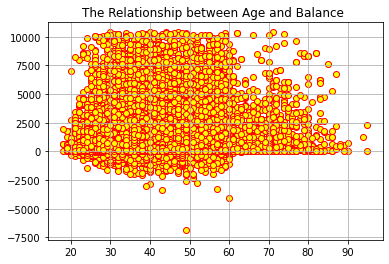

In [17]:
# Visulizing relationship between age and balance

plt.figsize = (7,5)
plt.scatter(df5['age'],df5['balance'],c='yellow',edgecolor='red')
plt.grid(True)

plt.title('The Relationship between Age and Balance ')
plt.show()

The plot shows that there is no clear relationship between age and balance. However, we may note that **customers above 60 years tend to have a balance <5000**.

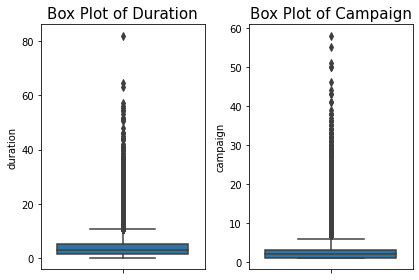

In [18]:
# Visualizing the distribution of duration and campaign

plt.figsize = (10,6)
fig, axes = plt.subplots(1, 2)

sns.boxplot(y=df5['duration'],ax=axes[0])
sns.boxplot(y=df5['campaign'],ax=axes[1])

axes[0].set_title('Box Plot of Duration',size=15)
axes[1].set_title('Box Plot of Campaign',size=15)

plt.tight_layout()
plt.show()

The box plot of **duration** shows that most of the calls have been between 1.73 to 5.3 minutes. There are also quite a number of outliers exceeding 10 minutes. This might be an indication of interest shown by the customers in such cases.

The box plot of **campaign** iterates the fact that most customers have been contacted 1-2 times. However, even in this case, outliers exist which are as high as 58. This might be a special case.

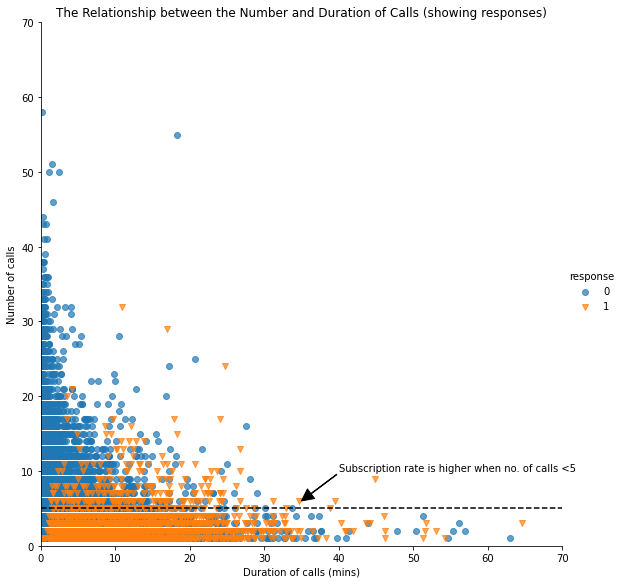

In [19]:
# Visualizing the relationship between duration, number of calls and response
call_dur = sns.lmplot(x='duration', y='campaign',data = df5,
                     hue = 'response',markers =['o', 'v'],
                     scatter_kws={'alpha':0.7}, height =8,fit_reg = False)

plt.axis([0,70,0,70])
plt.title('The Relationship between the Number and Duration of Calls (showing responses)')
plt.xlabel('Duration of calls (mins)')
plt.ylabel('Number of calls')

# Annotation
plt.axhline(y=5, linewidth=1.5, color="k", linestyle='--')
plt.annotate('Subscription rate is higher when no. of calls <5',xytext = (40,10),
             arrowprops=dict(color = 'k', width=0.5),xy=(35,6))
plt.show()

The postive responses (marked in orange) show a **higher percentage when number of calls are lesser than 5**. High number of calls mostly receive a negative response. Hence, the bank should not try and contact a customer repeatedly as it has little positive outcome and adds to the customers irritation.

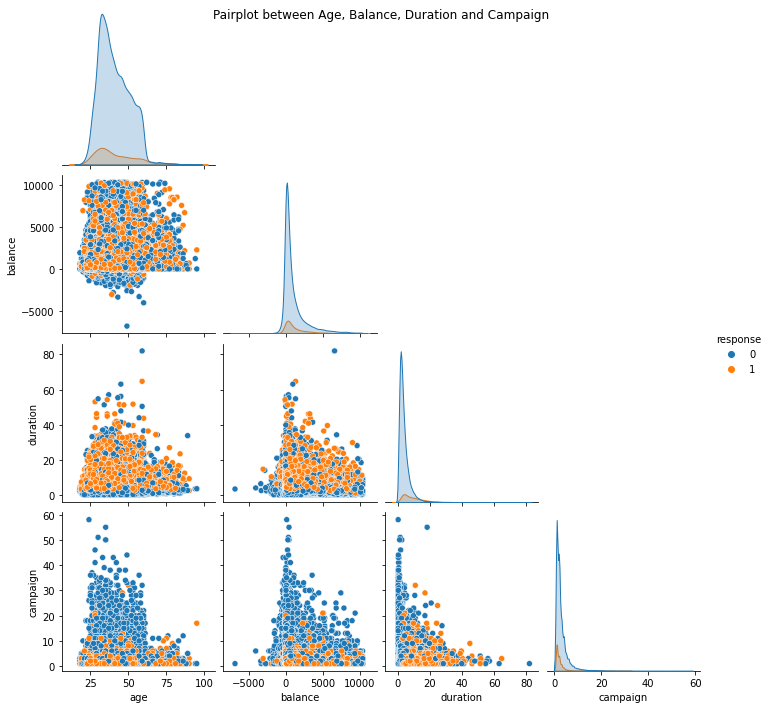

In [20]:
# Plotting a pairplot between age, balance, duration and campaign
sns.pairplot(df5,x_vars=['age','balance','duration','campaign'],
             y_vars= ['age','balance','duration','campaign'],
             hue='response',corner=True)
plt.suptitle('Pairplot between Age, Balance, Duration and Campaign')

plt.show()

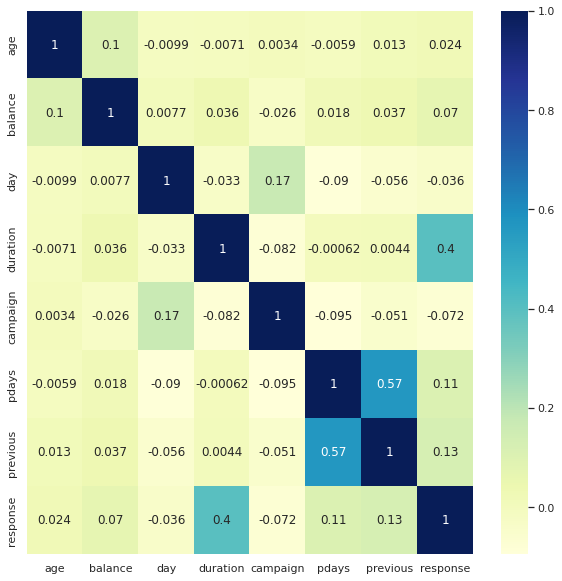

In [21]:
# Plotting the heatmap for the variables

sns.set(rc={"figure.figsize":(10, 10)})
ax = sns.heatmap(df5.corr(), cmap="YlGnBu", annot=True)
plt.show()

The pairplot does not bring out any significant trends with regards to a positive outcome of the campaign. For most of the variables, the positive outcome is fairly evenly spread out. However, only **lower number of calls** in previous campaigns ('campaign' variable) show a higher positive outcome.

From the heatmap of the variables, it is evident that only **duration** has a significant correlation with response.

### 5. Data Visualization

In [22]:
# Visualizing the response with respect to age and percentage contacted
df_temp = df5.copy()
df_temp.loc[df_temp["age"] < 30,  'age group'] = 20
df_temp.loc[(df_temp["age"] >= 30) & (df_temp["age"] <= 39), 'age group'] = 30
df_temp.loc[(df_temp["age"] >= 40) & (df_temp["age"] <= 49), 'age group'] = 40
df_temp.loc[(df_temp["age"] >= 50) & (df_temp["age"] <= 59), 'age group'] = 50
df_temp.loc[df_temp["age"] >= 60, 'age group'] = 60
df_temp.sample(10)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,age group
39233,27,entrepreneur,married,secondary,no,97,yes,yes,18,5,0.22,3,-1,0,unknown,0,20.0
29300,29,admin.,single,secondary,no,-498,yes,no,2,2,1.65,3,227,14,failure,0,20.0
9737,44,entrepreneur,married,tertiary,no,31,no,no,9,6,7.78,1,-1,0,unknown,0,40.0
1495,57,admin.,married,secondary,no,1216,yes,no,8,5,4.25,6,-1,0,unknown,0,50.0
18133,35,blue-collar,married,secondary,no,3188,yes,no,30,7,4.80,3,-1,0,unknown,0,30.0
25816,30,blue-collar,married,primary,no,1101,yes,yes,19,11,12.98,2,175,1,failure,0,30.0
18290,38,admin.,married,tertiary,no,1209,no,no,31,7,1.63,5,-1,0,unknown,0,30.0
32855,48,blue-collar,single,primary,no,3688,yes,no,17,4,7.03,1,-1,0,unknown,0,40.0
23597,48,housemaid,married,tertiary,no,197,no,no,28,8,4.27,8,-1,0,unknown,0,40.0
21345,45,technician,married,secondary,no,1629,no,no,18,8,0.97,4,-1,0,unknown,0,40.0


In [23]:
age_response_pct = pd.crosstab(df_temp['response'],
                               df_temp['age group']).apply(lambda x: x/x.sum() * 100)
age_response_pct = age_response_pct.transpose()
age_response_pct.columns=age_response_pct.columns.astype(str)
age_response_pct.rename(columns = {'0':'No', '1':'Yes'}, inplace = True) 
age_response_pct

response,No,Yes
age group,,
20.0,83.009298,16.990702
30.0,89.646617,10.353383
40.0,91.156268,8.843732
50.0,90.822615,9.177385
60.0,66.305085,33.694915


In [24]:
age = pd.DataFrame(df_temp['age group'].value_counts())
age['% Contacted'] = age['age group']*100/age['age group'].sum()
age['% Subscription'] = age_response_pct['Yes']
age.drop('age group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)
age

,% Contacted,% Subscription,age
20.0,11.632538,16.990702,20
30.0,40.625384,10.353383,30
40.0,25.767595,8.843732,40
50.0,18.348534,9.177385,50
60.0,3.625950,33.694915,60


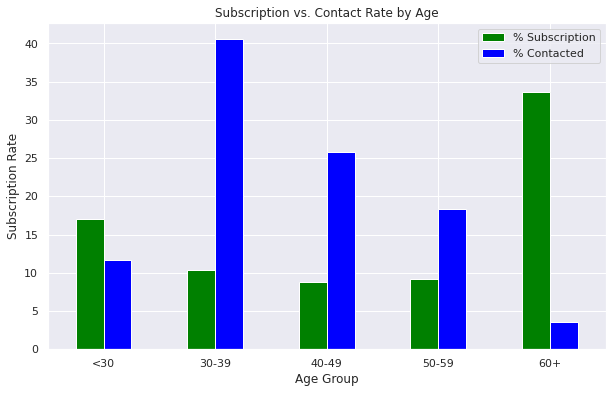

In [25]:
age_plot = age[['% Subscription','% Contacted']].plot(kind = 'bar',
                                              figsize=(10,6), color = ('green','blue'))
plt.title('Subscription vs. Contact Rate by Age')
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.show()

The percentage subscription is high among the young (<30) and old (60+) population. This may be because both these populations have a tendency of using a safe investment option.

In [26]:
#Visualizing the effect of balance on response rate
df_temp.loc[df_temp["balance"] <= 0,  'balance group'] = 'no balance'
df_temp.loc[(df_temp["balance"] > 0) & (df_temp["balance"] <= 1000), 'balance group'] = 'low balance'
df_temp.loc[(df_temp["balance"] > 1000) & (df_temp["balance"] <= 5000), 'balance group'] = 'average balance'
df_temp.loc[(df_temp["balance"] > 5000), 'balance group'] = 'high balance'
df_temp.head(5)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,age group,balance group
0,58,management,married,tertiary,no,2143,yes,no,5,5,4.35,1,-1,0,unknown,0,50.0,average balance
1,44,technician,single,secondary,no,29,yes,no,5,5,2.52,1,-1,0,unknown,0,40.0,low balance
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,5,1.27,1,-1,0,unknown,0,30.0,low balance
5,35,management,married,tertiary,no,231,yes,no,5,5,2.32,1,-1,0,unknown,0,30.0,low balance
6,28,management,single,tertiary,no,447,yes,yes,5,5,3.62,1,-1,0,unknown,0,20.0,low balance


In [28]:
balance_response_pct = pd.crosstab(df_temp['response'],
                                   df_temp['balance group']).apply(lambda x: x/x.sum() * 100)
balance_response_pct = balance_response_pct.transpose()
balance_response_pct.columns=balance_response_pct.columns.astype(str)
balance_response_pct.rename(columns={'0':'No', '1':'Yes'},inplace=True)
balance_response_pct

response,No,Yes
balance group,,
average balance,85.208041,14.791959
high balance,84.947368,15.052632
low balance,89.263444,10.736556
no balance,93.101406,6.898594


In [31]:
bal = pd.DataFrame(df_temp['balance group'].value_counts())
bal['% Contacted'] = bal['balance group']*100/bal['balance group'].sum()
bal['% Subscription'] = balance_response_pct['Yes']
bal.drop('balance group',axis = 1,inplace = True)

bal['bal'] = [1,2,0,3]
bal = bal.sort_values('bal',ascending = True)
bal

,% Contacted,% Subscription,bal
no balance,16.605620,6.898594,0
low balance,52.432459,10.736556,1
average balance,26.291207,14.791959,2
high balance,4.670715,15.052632,3


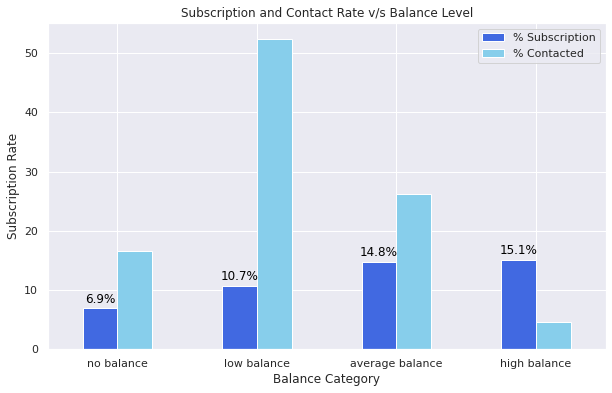

In [32]:
balance_plot = bal[['% Subscription','% Contacted']].plot(kind = 'bar',
                                               color = ('royalblue','skyblue'),
                                               figsize = (10,6))

plt.title('Subscription and Contact Rate v/s Balance Level')
plt.ylabel('Subscription Rate')
plt.xlabel('Balance Category')
plt.xticks(rotation = 'horizontal')

# Annotation
for rec, label in zip(balance_plot.patches,
                      bal['% Subscription'].round(1).astype(str)):
    balance_plot.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')

The graph shows a higher percentage of positive response among the average balance category and low in the no balance category. Banks, henceforth, should target people woth average balance or high balance, instead of targeting those with low or no balance.

In [33]:
df_temp.rename(columns={'response':'response_binary'},inplace=True)

In [35]:
#Visualizing subscription rate of different balance levels
df_temp.loc[df_temp['response_binary'] == 1,  'response'] = 'yes'
df_temp.loc[df_temp['response_binary'] == 0,  'response'] = 'no'

balance_age1 = pd.DataFrame(df_temp.groupby(['age group','balance group'])['response_binary'].sum())
balance_age2 = pd.DataFrame(df_temp.groupby(['age group','balance group'])['response'].count())

balance_age1['response'] = balance_age2['response']
balance_age1['response_rate'] = balance_age1['response_binary']/ (balance_age1['response'])
balance_age1 = balance_age1.drop(['response_binary','response'],axis =1)

balance_age1 = balance_age1.unstack()

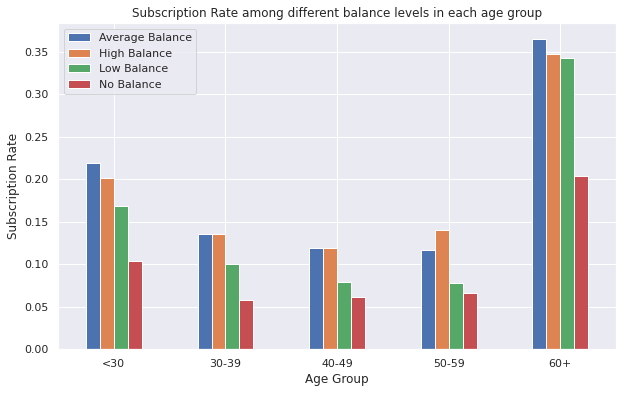

In [36]:
bal_age = balance_age1.plot(kind='bar',figsize = (10,6))

# Set x ticks
plt.xticks(np.arange(5),('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')

# Set legend
plt.legend(['Average Balance','High Balance','Low Balance','No Balance'],loc = 'best',ncol = 1)

plt.title('Subscription Rate among different balance levels in each age group')
plt.ylabel('Subscription Rate')
plt.xlabel('Age Group')
plt.show()

High subsription rates were observed in the young (<30) and old (60+) population with average or high balances. Hence, banks should target this group for more positive outcomes in the future.

In [37]:
# Visualizing subscription rate by job
job_response_pct = pd.crosstab(df_temp['response'],df_temp['job']).apply(lambda x: x/x.sum() * 100)
job_response_pct = job_response_pct.transpose()
job_response_pct

response,no,yes
job,,
admin.,88.034006,11.965994
blue-collar,92.763831,7.236169
entrepreneur,91.865672,8.134328
housemaid,91.209748,8.790252
management,86.863615,13.136385
retired,77.821782,22.178218
self-employed,88.773389,11.226611
services,91.265456,8.734544
student,70.537010,29.462990


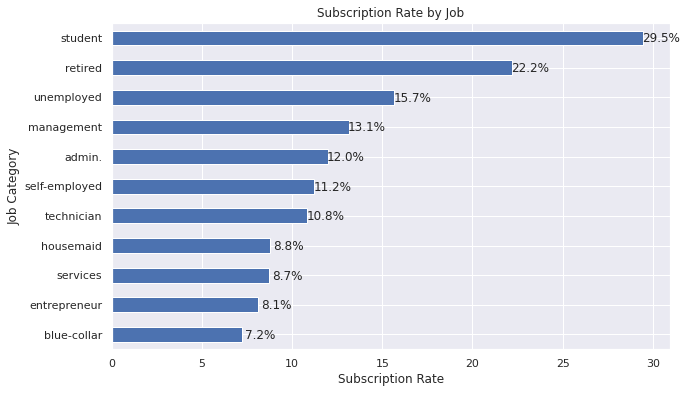

In [38]:
job_plot = job_response_pct['yes'].sort_values(ascending = True).plot(kind ='barh',
                                                                            figsize = (10,6))
                                                                               
plt.title('Subscription Rate by Job')
plt.xlabel('Subscription Rate')
plt.ylabel('Job Category')

# Annotation
for rec, label in zip(job_plot.patches,
                      job_response_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    job_plot.text(rec.get_width()+1, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

As is evident from previous data, banks should target the student population and the retired professionals who stay away from complicated investments.

In [39]:
# Visualizing subscription rate by month

month_response_pct = pd.crosstab(df_temp['response'],
                                 df_temp['month']).apply(lambda x: x/x.sum() * 100)
month_response_pct = month_response_pct.transpose()
month_response_pct

response,no,yes
month,,
1,89.778535,10.221465
10,54.757930,45.242070
11,89.838803,10.161197
12,54.335260,45.664740
2,82.784698,17.215302
3,45.544554,54.455446
4,80.411555,19.588445
5,93.395848,6.604152
6,89.829451,10.170549


In [40]:
month = pd.DataFrame(df_temp['month'].value_counts())
month['% Contacted'] = month['month']*100/month['month'].sum()
month['% Subscription'] = month_response_pct['yes']
month.drop('month',axis = 1,inplace = True)

month['Month'] = [5,7,8,6,11,4,2,1,10,9,3,12]
month = month.sort_values('Month',ascending = True)

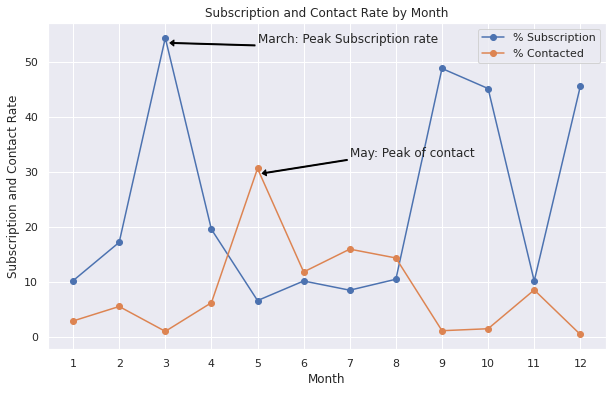

In [41]:
month_plot = month[['% Subscription','% Contacted']].plot(kind ='line',
                                                          figsize = (10,6),
                                                          marker = 'o')

plt.title('Subscription and Contact Rate by Month')
plt.ylabel('Subscription and Contact Rate')
plt.xlabel('Month')

ticks = np.arange(0,12,1)
plt.xticks(ticks,np.arange(1,13,1))

# Annotation: Peak of contact
y = month['% Contacted'].max()
x = float(month['% Contacted'].idxmax())
plt.annotate('May: Peak of contact', xy=(x+0.1-1.0, y+0.1-1.0), xytext=(x+1,y+4),
             arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4,edgecolor='black'), 
             horizontalalignment='left', verticalalignment='top')

# Annotation: Peak of subscription rate
y = month['% Subscription'].max()
x = float(month['% Subscription'].idxmax())
plt.annotate('March: Peak Subscription rate', xy=(x+0.1-1.0, y+0.1-1.0), xytext=(x+1,y+1), 
             arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4,edgecolor='black'), 
             horizontalalignment='left', verticalalignment='top')

plt.show()

The subscription rate and the number of contacted don't align completely. Hence, the banks should focus on March and September, October and lower the number of calls during the summer.

### 5. Machine Learning

In [43]:
df5_copy=df5.copy()
df5_copy.sample(5)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response
28185,33,management,divorced,tertiary,no,893,yes,no,29,1,4.32,1,259,9,failure,0
21971,50,entrepreneur,divorced,tertiary,no,101,no,no,20,8,2.20,2,-1,0,unknown,0
40980,33,admin.,married,secondary,no,1604,no,no,13,8,1.30,2,-1,0,unknown,0
24220,57,management,married,secondary,no,7162,no,no,17,11,1.38,1,-1,0,unknown,0
26840,51,admin.,married,secondary,no,4178,yes,no,20,11,2.78,4,174,1,failure,0


Relevant customer information which affects the outcome shall be considered. These are age, job, balance, education, , default status, housing status and loan status.

In [44]:
#Selecting required columns
df5_copy.drop(['marital'],axis=1, inplace=True)
df6 = df5_copy.iloc[:, 0:7]

In [63]:
#Performing encoding of categorical variables
df7 = pd.get_dummies(df6, columns = ['job'])
df8 = pd.get_dummies(df7, columns = ['education'])
df8['housing'] = df8['housing'].map({'yes': 1, 'no': 0})
df8['default'] = df8['default'].map({'yes': 1, 'no': 0})
df8['loan'] = df8['loan'].map({'yes': 1, 'no': 0})
df_y = pd.DataFrame(df5_copy['response'])
df8 = pd.merge(df8, df_y, left_index = True, right_index = True)
df8.sample(5)

,age,default,balance,housing,loan,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,education_primary,education_secondary,education_tertiary,response
29133,34,0,926,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
12904,43,0,1530,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
9826,47,0,361,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
13361,32,0,123,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
32667,40,0,300,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [64]:
# Selecting the model features
arr = df8.values

# Selecting first 20 columns as features
X = arr[:,0:-1]

# Selecting 'response' column as output
Y = arr[:,-1]

In [55]:
# Importing modules for classification

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression

In [65]:
# Splitting the data 80:20
m= 0.20
seed = 10
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=m, random_state=seed)

In [68]:
# Fitting the data on the training set
lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression()

In [69]:
#Predicting on the test set
predict = lr.predict(X_test)

In [70]:
# Calculating accuracy Score 
print(accuracy_score(Y_test, predict))

0.8831120943952803


The accuracy of the LR model shows satisfactory results with **88.3%** accuracy and is efficient in predicting the results.